In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay

import pandas as pd

# Load data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
!pwd

/content


In [66]:
features_exp_meth = pd.read_csv("drive/MyDrive/LIHC/features_exp_meth.tsv", sep = "\t")
features_exp_meth.head()

,ENSG00000162670.11,ENSG00000250579.2,ENSG00000249001.5,ENSG00000106038.13,ENSG00000229876.1,ENSG00000179083.6,ENSG00000146755.11,ENSG00000029559.7,ENSG00000159184.8,ENSG00000250284.3,...,cg06752054,cg12544663,cg22509384,cg26315617,cg10065209,cg02144924,cg22730626,cg01973908,sample_type,vital_status
TCGA-ZP-A9CY-01,5,93,1,0,1,1,17,4,0,0,...,0.057347,0.401574,0.508229,0.359991,0.846454,0.385705,0.441197,0.304071,Primary Tumor,Alive
TCGA-DD-AAVZ-01,0,72,0,2,0,0,2444,0,0,0,...,0.028248,0.977648,0.981029,0.975435,0.643069,0.975916,0.975635,0.930332,Primary Tumor,Alive
TCGA-DD-A1EC-11,0,0,0,0,0,1,19,0,2,0,...,0.646390,0.974809,0.976811,0.982140,0.975125,0.970166,0.984650,0.920895,Solid Tissue Normal,Alive
TCGA-DD-A1EC-01,0,0,0,0,0,0,2,0,0,0,...,0.038572,0.973979,0.965864,0.857735,0.548383,0.941636,0.611837,0.411359,Primary Tumor,Alive
TCGA-G3-A25T-01,0,49,0,15,0,3,56,409,123,0,...,0.793002,0.982413,0.979154,0.977417,0.985435,0.964828,0.975571,0.939466,Primary Tumor,Alive


In [17]:
features_complete = pd.read_csv("drive/MyDrive/LIHC/features_complete.tsv", sep = "\t")
features_complete.head()

,ENSG00000162670.11,ENSG00000250579.2,ENSG00000249001.5,ENSG00000106038.13,ENSG00000229876.1,ENSG00000179083.6,ENSG00000146755.11,ENSG00000029559.7,ENSG00000159184.8,ENSG00000250284.3,...,chr19:1-5455610,chr19:15361827-15600481,chr19:33723706-33837231,chr20:13964029-16252980,chr20:49017144-49057135,chr20:60328006-63025520,chr22:28314430-29085838,chr22:44205320-51304566,vital_status,days_to_death
TCGA-ZP-A9CY-01,5,93,1,0,1,1,17,4,0,0,...,0,0,0,0,0,0,0,0,Alive,NaN
TCGA-DD-AAVZ-01,0,72,0,2,0,0,2444,0,0,0,...,0,0,0,0,0,0,0,0,Alive,NaN
TCGA-DD-A1EC-01,0,0,0,0,0,0,2,0,0,0,...,0,1,1,0,0,0,0,0,Alive,NaN
TCGA-G3-A25T-01,0,49,0,15,0,3,56,409,123,0,...,0,1,1,0,0,0,1,1,Alive,NaN
TCGA-CC-A8HT-01,156,1,65,8,196,558,153,5,13,36,...,0,0,0,0,0,0,0,0,Dead,140.0


# Predicting tissue type from DEGs and DMLs 

In [52]:
##highly imbalanced > subsample?
features_exp_meth.loc[:,'sample_type'].value_counts()

Primary Tumor          371
Solid Tissue Normal     41
Name: sample_type, dtype: int64

In [80]:
##predict sample type using expression and methylation data

X = features_exp_meth.drop(['sample_type', 'vital_status'], axis = 1)
y = features_exp_meth.loc[:,'sample_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0) 

clf = RandomForestClassifier(random_state=0)

clf.fit(X_train, y_train)

y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

print("classification report on the train set: \n" ,classification_report(y_train, y_pred_train))
print("classification report on the test set: \n" ,classification_report(y_test, y_pred_test))

classification report on the train set: 
                      precision    recall  f1-score   support

      Primary Tumor       1.00      1.00      1.00       253
Solid Tissue Normal       1.00      1.00      1.00        21

           accuracy                           1.00       274
          macro avg       1.00      1.00      1.00       274
       weighted avg       1.00      1.00      1.00       274

classification report on the test set: 
                      precision    recall  f1-score   support

      Primary Tumor       0.98      0.99      0.99       117
Solid Tissue Normal       0.94      0.89      0.92        19

           accuracy                           0.98       136
          macro avg       0.96      0.94      0.95       136
       weighted avg       0.98      0.98      0.98       136



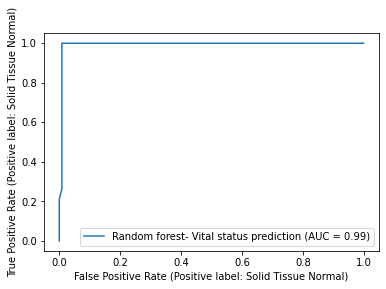

In [81]:
RocCurveDisplay.from_estimator(clf,X_test, y_test, name = 'Random forest- Vital status prediction')

# Predicting vital status from DEGs, DMLs and CNVs

In [72]:
##still imbalanced
features_complete.loc[:,'vital_status'].value_counts()

Alive           236
Dead            127
Not Reported      1
Name: vital_status, dtype: int64

In [73]:
##remove rows with vital status not available
features_complete = features_complete.drop(features_complete[features_complete.vital_status=='Not Reported'].index)

In [74]:
features_complete.loc[:,'vital_status'].value_counts()

Alive    236
Dead     127
Name: vital_status, dtype: int64

In [76]:
##predict vital_status using expression, methylation and cnv data
X = features_complete.drop(['vital_status', 'days_to_death'], axis = 1)
y = features_complete.loc[:,'vital_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0) 

clf = RandomForestClassifier(random_state=0,class_weight='balanced', n_estimators = 500)

clf.fit(X_train, y_train)

y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

print("classification report on the train set: \n" ,classification_report(y_train, y_pred_train))
print("classification report on the test set: \n" ,classification_report(y_test, y_pred_test))

classification report on the train set: 
               precision    recall  f1-score   support

       Alive       1.00      1.00      1.00       159
        Dead       1.00      1.00      1.00        84

    accuracy                           1.00       243
   macro avg       1.00      1.00      1.00       243
weighted avg       1.00      1.00      1.00       243

classification report on the test set: 
               precision    recall  f1-score   support

       Alive       0.65      0.95      0.77        77
        Dead       0.43      0.07      0.12        43

    accuracy                           0.63       120
   macro avg       0.54      0.51      0.44       120
weighted avg       0.57      0.63      0.54       120



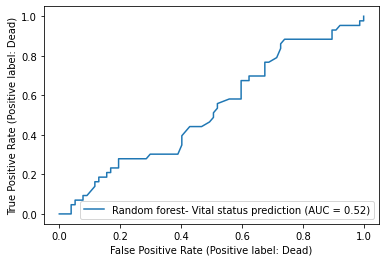

In [79]:
RocCurveDisplay.from_estimator(clf,X_test, y_test, name = 'Random forest- Vital status prediction')